In [2]:
from netCDF4 import Dataset
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [3]:
read_nc = Dataset(r'S5P_OFFL_L2__CH4____20230910T063145_20230910T081315_30615_03_020500_20230912T014127.nc', 'r')
print(type(read_nc))
print(read_nc.groups)


<class 'netCDF4._netCDF4.Dataset'>
{'PRODUCT': <class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(4173), ground_pixel(215), corner(4), time(1), layer(12), level(13)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 layer(layer), int32 level(level), int32 delta_time(time, scanline), <class 'str'> time_utc(time, scanline), uint8 qa_value(time, scanline, ground_pixel), float32 latitude(time, scanline, ground_pixel), float32 longitude(time, scanline, ground_pixel), float32 methane_mixing_ratio(time, scanline, ground_pixel), float32 methane_mixing_ratio_precision(time, scanline, ground_pixel), float32 methane_mixing_ratio_bias_corrected(time, scanline, ground_pixel)
    groups: SUPPORT_DATA, 'METADATA': <class 'netCDF4._netCDF4.Group'>
group /METADATA:
    dimensions(sizes): 
    variables(dimensions): 
    groups: QA_STATISTICS, ALGORITHM_SETTINGS, GRANULE_DESCRIPTION, ISO_METAD

In [4]:
print(read_nc.groups['PRODUCT'])

<class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(4173), ground_pixel(215), corner(4), time(1), layer(12), level(13)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 layer(layer), int32 level(level), int32 delta_time(time, scanline), <class 'str'> time_utc(time, scanline), uint8 qa_value(time, scanline, ground_pixel), float32 latitude(time, scanline, ground_pixel), float32 longitude(time, scanline, ground_pixel), float32 methane_mixing_ratio(time, scanline, ground_pixel), float32 methane_mixing_ratio_precision(time, scanline, ground_pixel), float32 methane_mixing_ratio_bias_corrected(time, scanline, ground_pixel)
    groups: SUPPORT_DATA


In [5]:
print(read_nc.groups['PRODUCT'].variables.keys())

dict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'layer', 'level', 'delta_time', 'time_utc', 'qa_value', 'latitude', 'longitude', 'methane_mixing_ratio', 'methane_mixing_ratio_precision', 'methane_mixing_ratio_bias_corrected'])


In [6]:
print(read_nc.groups['PRODUCT'].variables['time'])

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: seconds since 2010-01-01 00:00:00
    standard_name: time
    axis: T
    long_name: reference time for the measurements
    comment: The time in this variable corresponds to the time in the time_reference global attribute
    _FillValue: -2147483647
path = /PRODUCT
unlimited dimensions: 
current shape = (1,)
filling on


In [53]:
print(read_nc.groups['PRODUCT'].variables['methane_mixing_ratio_precision'])
print("--------------")
print(read_nc.groups['PRODUCT'].variables['methane_mixing_ratio_precision'].shape)
print("--------------")
print(read_nc.groups['PRODUCT'].variables['methane_mixing_ratio_precision'].dimensions)


<class 'netCDF4._netCDF4.Variable'>
float32 methane_mixing_ratio_precision(time, scanline, ground_pixel)
    units: 1e-9
    standard_name: dry_atmosphere_mole_fraction_of_methane standard_error
    long_name: precision of the column averaged dry air mixing ratio of methane
    coordinates: longitude latitude
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 4173, 215)
filling on
--------------
(1, 4173, 215)
--------------
('time', 'scanline', 'ground_pixel')


In [20]:
# 获取 methane_mixing_ratio_precision 变量及其维度
methane_mixing_ratio_precision = read_nc.groups['PRODUCT'].variables['methane_mixing_ratio_precision']
print(type(methane_mixing_ratio_precision[:]))

# time = methane_mixing_ratio_precision.variables['time']
# scanline = methane_mixing_ratio_precision.variables['scanline']
# ground_pixel = methane_mixing_ratio_precision.variables['ground_pixel']

<class 'numpy.ma.core.MaskedArray'>


In [38]:
lons = read_nc.groups['PRODUCT'].variables['longitude'][:][0, :, :]
print(lons)
print(lons.shape)
lats = read_nc.groups['PRODUCT'].variables['latitude'][:][0, :, :]
print(type(lats))
print(lats.shape)
CH4 = read_nc.groups['PRODUCT'].variables['methane_mixing_ratio_precision'][0, :, :]
print(CH4)
print(CH4.shape)
print(np.ma.compressed(CH4))

[[ -46.352905  -48.52955   -50.729557 ... -154.43819  -154.52986
  -154.62334 ]
 [ -46.141968  -48.32374   -50.530457 ... -154.57314  -154.66296
  -154.75455 ]
 [ -45.928345  -48.115158  -50.328537 ... -154.70825  -154.79622
  -154.8859  ]
 ...
 [ -50.982872  -51.53571   -52.06571  ... -103.90694  -104.74228
  -105.62277 ]
 [ -51.054653  -51.607315  -52.137127 ... -103.89816  -104.73163
  -105.61016 ]
 [ -51.12608   -51.678574  -52.208206 ... -103.88931  -104.72091
  -105.597466]]
(4173, 215)
<class 'numpy.ma.core.MaskedArray'>
(4173, 215)
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
(4173, 215)
[6.361763  5.4349713 6.328216  ... 5.701922  5.35996   5.267653 ]


In [27]:
CH4_units = read_nc.groups['PRODUCT'].variables['methane_mixing_ratio_precision'].units
print(CH4_units)

1e-9


AttributeError: 'str' object has no attribute 'shape'

In [36]:
lon_0 = lons.mean()
lat_0 = lats.mean()
print(lon_0)
print(lat_0)

68.72493
6.0891547


In [32]:
# 读图
CH4_draw = np.squeeze(CH4)
print(type(CH4_draw))
fig = plt.figure(figsize=(64, 48), dpi=100)
m = Basemap()  # 绘制底图

<class 'numpy.ma.core.MaskedArray'>


<Figure size 6400x4800 with 0 Axes>

In [37]:
xi, yi = m(lons, lats)  # 绘制底图的坐标矩阵
print(xi.shape)
print(xi)
print(yi.shape)

(4173, 215)
[[ -46.352905  -48.52955   -50.729557 ... -154.43819  -154.52986
  -154.62334 ]
 [ -46.141968  -48.32374   -50.530457 ... -154.57314  -154.66296
  -154.75455 ]
 [ -45.928345  -48.115158  -50.328537 ... -154.70825  -154.79622
  -154.8859  ]
 ...
 [ -50.982872  -51.53571   -52.06571  ... -103.90694  -104.74228
  -105.62277 ]
 [ -51.054653  -51.607315  -52.137127 ... -103.89816  -104.73163
  -105.61016 ]
 [ -51.12608   -51.678574  -52.208206 ... -103.88931  -104.72091
  -105.597466]]
(4173, 215)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13964\2493194717.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reds = plt.cm.get_cmap('Accent', len(boundaries))
C:\Users\DELL\AppData\Local\Temp\ipykernel_13964\2493194717.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  cs = m.pcolormesh(xi, yi, CH4, shading='auto', cmap='CMRmap', vmin=0, vmax=12)  # pcolor函数是指使用xi和yi为横纵坐标


<class 'numpy.ma.core.MaskedArray'>


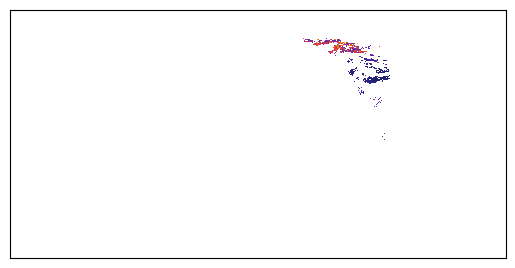

In [50]:
boundaries = np.arange(0, 0.5, 0.005)
cmap_reds = plt.cm.get_cmap('Accent', len(boundaries))
cs = m.pcolormesh(xi, yi, CH4, shading='auto', cmap='CMRmap', vmin=0, vmax=12)  # pcolor函数是指使用xi和yi为横纵坐标
print(type(cs.get_array()))

C:\Users\DELL\AppData\Local\Temp\ipykernel_13964\845677546.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reds = plt.cm.get_cmap('jet_r', len(boundaries))
C:\Users\DELL\AppData\Local\Temp\ipykernel_13964\845677546.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  cs = m.pcolormesh(xi, yi, CH4,  cmap='CMRmap', vmin=0, vmax=12)  # pcolor函数是指使用xi和yi为横纵坐标


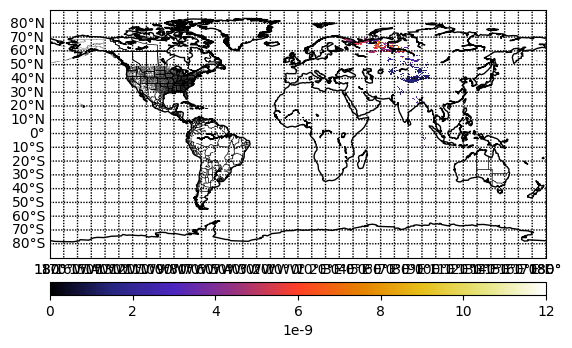

In [52]:
boundaries = np.arange(0, 0.5, 0.005)
cmap_reds = plt.cm.get_cmap('jet_r', len(boundaries))
cs = m.pcolormesh(xi, yi, CH4,  cmap='CMRmap', vmin=0, vmax=12)  # pcolor函数是指使用xi和yi为横纵坐标
m.drawparallels(np.arange(-80., 81., 10.), labels=[1, 0, 0, 0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0, 0, 0, 1], fontsize=10)
m.drawcoastlines()
m.drawstates()
m.drawcounties()
cbar = m.colorbar(location='bottom', pad="10%")
cbar.set_label(CH4_units)
fig.savefig('test.png', dpi=100)
plt.show()